In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ANUSHA\Documents\NIIT_C5\Project_DataFiles\DS1_C5_S5_Hotel Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [3]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [4]:
print(df.head()) 

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         68               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0         10               2015               July   
3  Resort Hotel            0          9               2015               July   
4  Resort Hotel            0         51               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          2   
2                        27                          3   
3                        27                          3   
4                        28                          6   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     4       2  ...    No Deposit   
1     

In [5]:
# Handle missing values
# Drop rows with missing critical fields like 'hotel' or 'reservation_status'
data = df.dropna(subset=['hotel', 'reservation_status'])
# Impute missing values for numeric fields like 'lead_time' with the mean
data['lead_time'] = data['lead_time'].fillna(data['lead_time'].mean())

In [6]:
# Convert data types
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors = 'coerce')

In [7]:
# Remove duplicates
data = data.drop_duplicates()
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-05-07
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-04-07
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,2015-05-07
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,2015-04-07
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,2015-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,NaT
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,2017-01-09
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,2017-01-09
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,2017-03-09


In [8]:
# formatting
data['customer_type'] = data['customer_type'].str.strip().str.lower()  

# Remove invalid or outlier data (e.g., negative or extreme lead times)
data = data[data['lead_time'] >= 0]

In [9]:
# Filter rows
data = data[data['adults'] + data['children'] + data['babies'] > 0]  # Remove bookings with zero guests
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,transient,97.00,0,3,Check-Out,2015-05-07
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,transient,98.00,0,1,Check-Out,2015-04-07
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,transient,153.00,1,0,Check-Out,2015-05-07
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,transient,94.71,0,0,Check-Out,2015-04-07
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,transient,117.81,1,2,Check-Out,2015-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,transient,132.53,0,2,Check-Out,NaT
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,transient,147.68,0,0,Check-Out,2017-01-09
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,transient,80.10,0,1,Check-Out,2017-01-09
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,transient,117.00,0,1,Check-Out,2017-03-09


In [10]:
# Save the cleaned data
data.to_csv('cleaned_hotel_bookings.csv', index=False)

print("Data cleaning complete. Cleaned data saved to 'cleaned_hotel_bookings.csv'.")

Data cleaning complete. Cleaned data saved to 'cleaned_hotel_bookings.csv'.


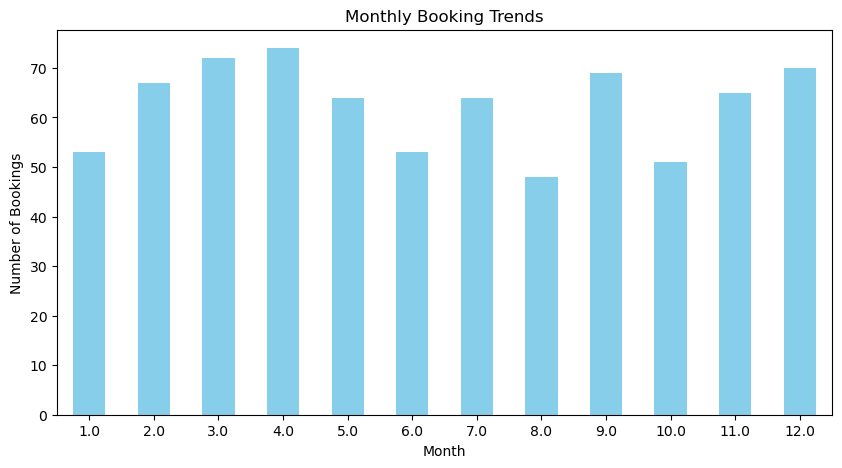

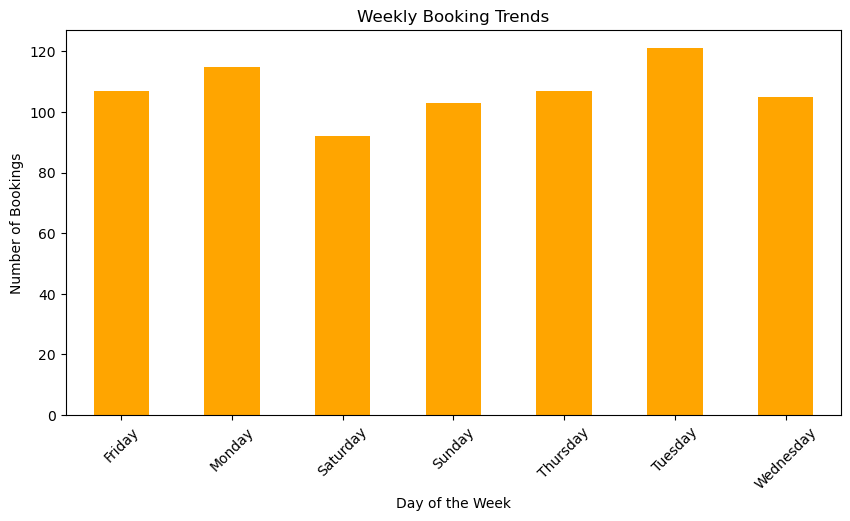

In [11]:
# Task_2_a

# Convert 'reservation_status_date' to datetime if not already done
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract year, month, and day of the week
data['month'] = data['reservation_status_date'].dt.month
data['day_of_week'] = data['reservation_status_date'].dt.day_name()

# Group by month and count bookings
monthly_bookings = data.groupby('month').size()
weekly_bookings = data.groupby('day_of_week').size()

# Plot monthly booking trends
plt.figure(figsize=(10, 5))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

# Plot weekly booking trends
plt.figure(figsize=(10, 5))
weekly_bookings.plot(kind='bar', color='orange')
plt.title('Weekly Booking Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

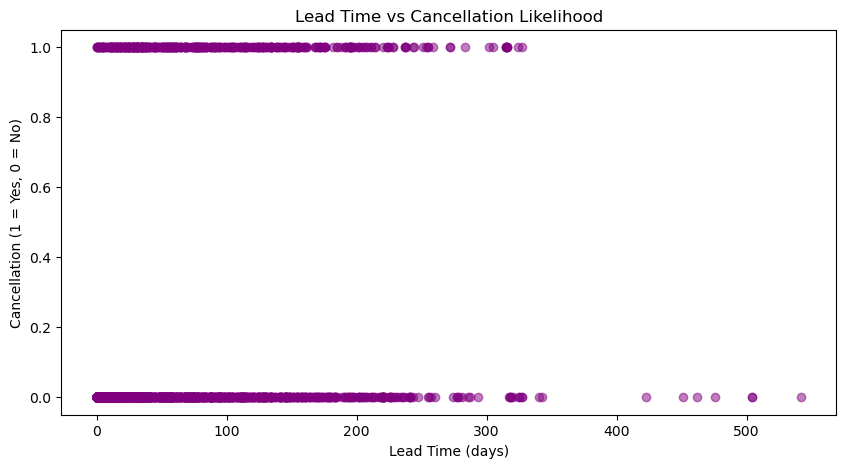

Average lead time for canceled bookings: 91.44 days
Average lead time for non-canceled bookings: 61.45 days


In [12]:
# Task_2_b 

plt.figure(figsize=(10, 5))
plt.scatter(data['lead_time'], data['is_canceled'], alpha=0.5, color='purple')
plt.title('Lead Time vs Cancellation Likelihood')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (1 = Yes, 0 = No)')
plt.show()

# Calculate average lead time for canceled vs non-canceled bookings
lead_time_canceled = data[data['is_canceled'] == 1]['lead_time'].mean()
lead_time_not_canceled = data[data['is_canceled'] == 0]['lead_time'].mean()

print(f"Average lead time for canceled bookings: {lead_time_canceled:.2f} days")
print(f"Average lead time for non-canceled bookings: {lead_time_not_canceled:.2f} days")

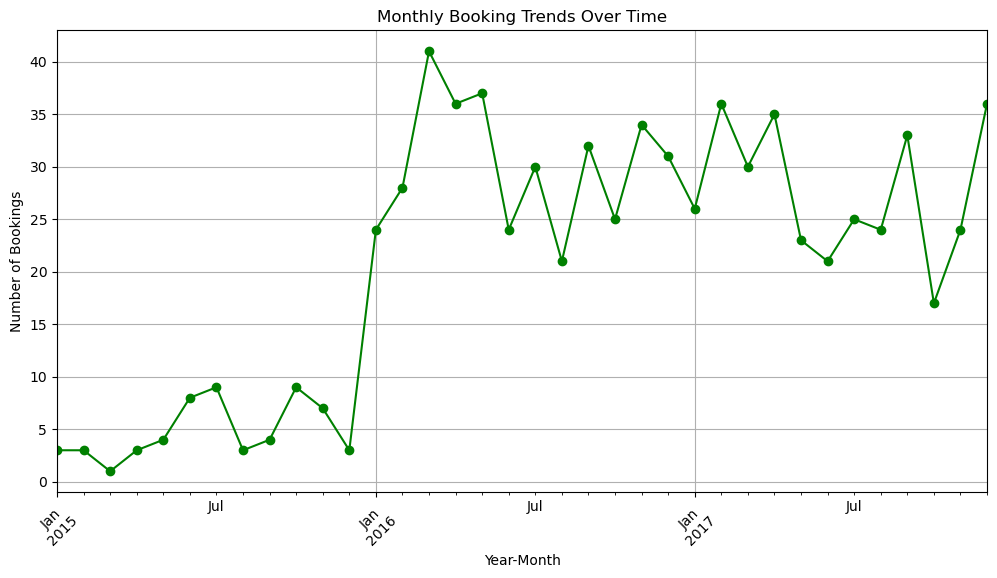

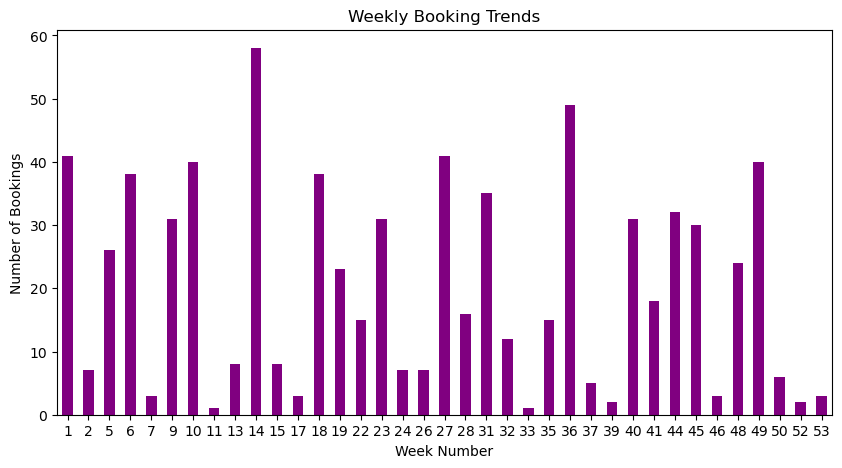

In [13]:
# Task_2_c

data['year_month'] = data['reservation_status_date'].dt.to_period('M')
monthly_trends = data.groupby('year_month').size()

# Booking patterns by day of the week
daily_trends = data.groupby('day_of_week').size()

# Booking patterns by week number
data['week_number'] = data['reservation_status_date'].dt.isocalendar().week
weekly_trends = data.groupby('week_number').size()

# Plot monthly booking trends over years
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', color='green', marker='o')
plt.title('Monthly Booking Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Booking patterns by week number
plt.figure(figsize=(10, 5))
weekly_trends.plot(kind='bar', color='purple')
plt.title('Weekly Booking Trends')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

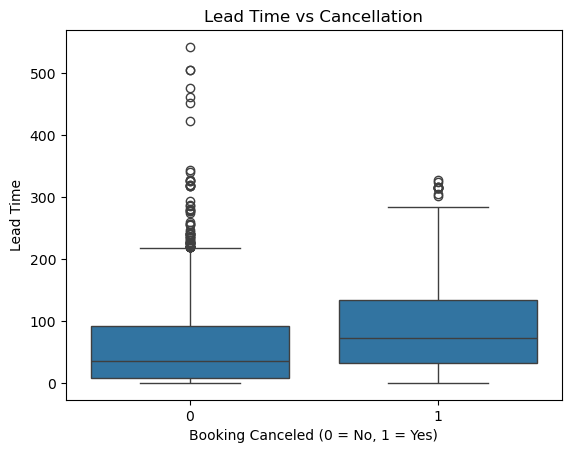

Cancellation Rates by Hotel Type:
hotel
City Hotel      0.277817
Resort Hotel    0.141921
Name: is_canceled, dtype: float64

Cancellation Rates by Customer Type:
customer_type
contract           0.000000
group              0.000000
transient          0.269346
transient-party    0.047059
Name: is_canceled, dtype: float64


In [14]:
# Task_3_a 

# Analyze individual factors
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Booking Canceled (0 = No, 1 = Yes)')
plt.ylabel('Lead Time')
plt.show()

# Cancellation rates by hotel type
cancellation_by_hotel = data.groupby('hotel')['is_canceled'].mean()
print("Cancellation Rates by Hotel Type:")
print(cancellation_by_hotel)

# Cancellation rates by customer type
cancellation_by_customer = data.groupby('customer_type')['is_canceled'].mean()
print("\nCancellation Rates by Customer Type:")
print(cancellation_by_customer)

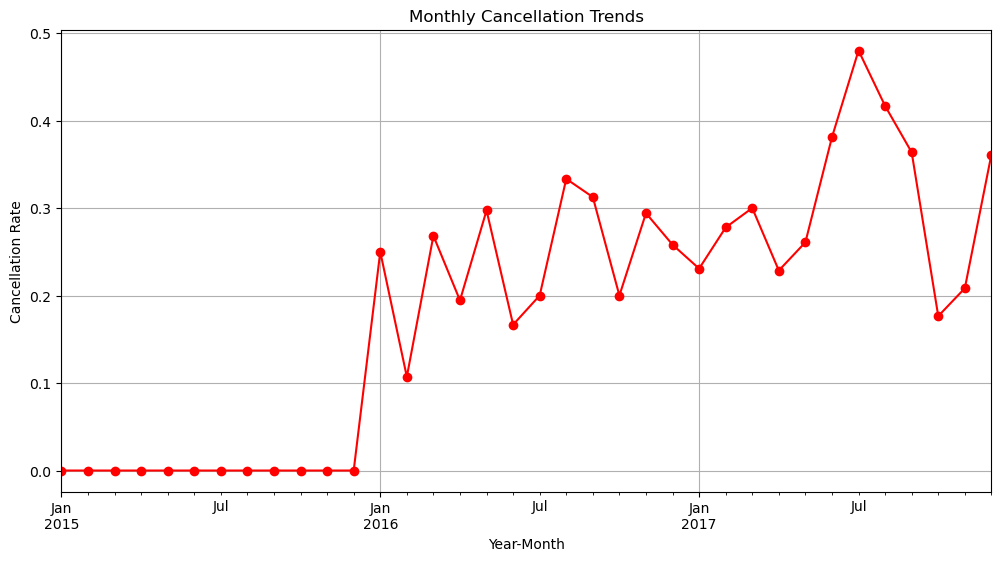

In [15]:
#Task_3_b 

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract year and month
data['year_month'] = data['reservation_status_date'].dt.to_period('M')

# Group by month and calculate cancellation rates
cancellation_trends = data.groupby('year_month')['is_canceled'].mean()

# Plot trends
plt.figure(figsize=(12, 6))
cancellation_trends.plot(kind='line', marker='o', color='red')
plt.title('Monthly Cancellation Trends')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()

In [16]:
#Task_3_c 

lead_time_threshold = data['lead_time'].quantile(0.75)  # Top 25% lead times
special_requests_threshold = 0  # Bookings with no special requests are more likely to cancel
previous_cancellations_threshold = 1  # More than 1 previous cancellation is high-risk

# Add a 'high_risk' flag based on these thresholds
data['high_risk'] = (
    (data['lead_time'] > lead_time_threshold) | 
    (data['total_of_special_requests'] <= special_requests_threshold) | 
    (data['previous_cancellations'] >= previous_cancellations_threshold)
)

# Check high-risk cancellation rate
high_risk_cancellation_rate = data[data['high_risk'] == True]['is_canceled'].mean()
overall_cancellation_rate = data['is_canceled'].mean()

print(f"Overall Cancellation Rate: {overall_cancellation_rate:.2%}")
print(f"High-Risk Cancellation Rate: {high_risk_cancellation_rate:.2%}")

# Summarize high-risk booking statistics
high_risk_summary = data[data['high_risk'] == True][
    ['lead_time', 'total_of_special_requests', 'previous_cancellations', 'is_canceled']
].describe()

print("\nHigh-Risk Booking Summary:")
print(high_risk_summary)

Overall Cancellation Rate: 24.45%
High-Risk Cancellation Rate: 30.83%

High-Risk Booking Summary:
         lead_time  total_of_special_requests  previous_cancellations  \
count  1106.000000                1106.000000                  1106.0   
mean     90.820072                   0.380651                     0.0   
std      86.580882                   0.768583                     0.0   
min       0.000000                   0.000000                     0.0   
25%      13.000000                   0.000000                     0.0   
50%      73.500000                   0.000000                     0.0   
75%     145.000000                   0.000000                     0.0   
max     542.000000                   5.000000                     0.0   

       is_canceled  
count  1106.000000  
mean      0.308318  
std       0.462008  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Cluster Centers:
    lead_time  total_of_special_requests  previous_cancellations
0   38.524011              -7.771561e-16                     0.0
1  198.568750               8.187500e-01                     0.0
2   44.876338               1.385256e+00                     0.0


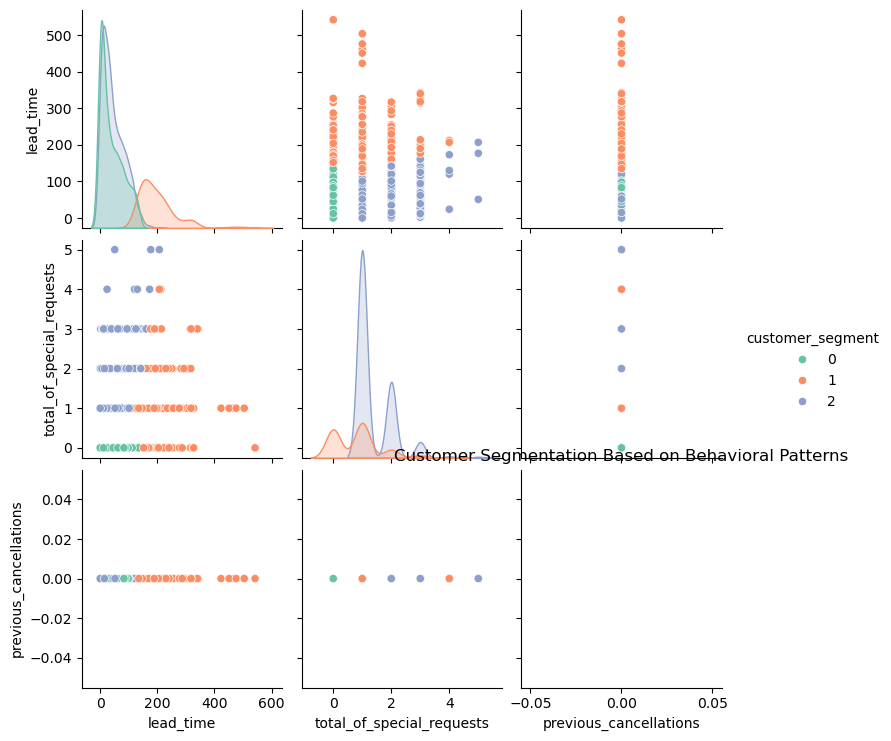

Marketing Channel Effectiveness by Customer Segment:
market_segment    Aviation  Complementary  Corporate    Direct    Groups  \
customer_segment                                                           
0                 0.001412       0.001412   0.019774  0.268362  0.035311   
1                 0.000000       0.000000   0.018750  0.096875  0.065625   
2                 0.000000       0.000000   0.008323  0.124851  0.013080   

market_segment    Offline TA/TO  Online TA  
customer_segment                            
0                      0.079096   0.594633  
1                      0.103125   0.715625  
2                      0.026159   0.827586  


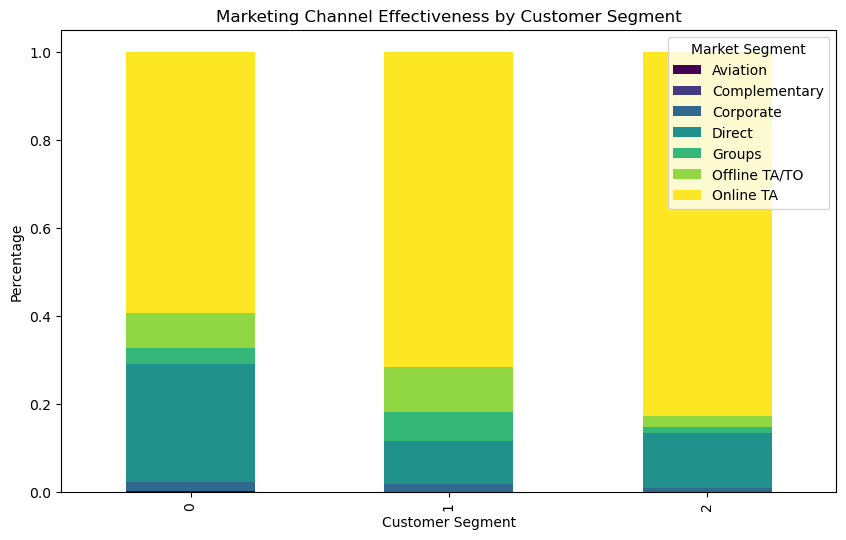

In [17]:
#Task_4_a

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['lead_time', 'total_of_special_requests', 'previous_cancellations']
clustering_data = data[features].fillna(0)  # Handle missing values

# Scale the features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume 3 segments; adjust as needed
data['customer_segment'] = kmeans.fit_predict(clustering_data_scaled)

# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centers:")
print(cluster_centers)

# Visualize the clusters
sns.pairplot(data, vars=features, hue='customer_segment', palette='Set2')
plt.title('Customer Segmentation Based on Behavioral Patterns')
plt.show()
# Market segment distribution by customer segment
channel_effectiveness = data.groupby(['customer_segment', 'market_segment']).size().unstack().fillna(0)

# Normalize to get percentages
channel_effectiveness_percentage = channel_effectiveness.div(channel_effectiveness.sum(axis=1), axis=0)

print("Marketing Channel Effectiveness by Customer Segment:")
print(channel_effectiveness_percentage)

# Visualize the distribution
channel_effectiveness_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Marketing Channel Effectiveness by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.legend(title='Market Segment')
plt.show()

Marketing Channel Effectiveness by Customer Segment:
market_segment    Aviation  Complementary  Corporate    Direct    Groups  \
customer_segment                                                           
0                 0.001412       0.001412   0.019774  0.268362  0.035311   
1                 0.000000       0.000000   0.018750  0.096875  0.065625   
2                 0.000000       0.000000   0.008323  0.124851  0.013080   

market_segment    Offline TA/TO  Online TA  
customer_segment                            
0                      0.079096   0.594633  
1                      0.103125   0.715625  
2                      0.026159   0.827586  


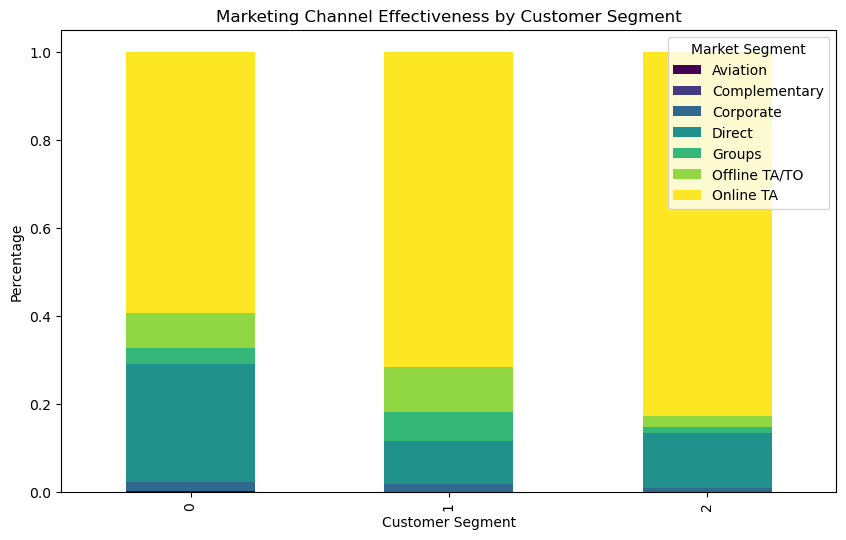

In [18]:
# Task_4_b

channel_effectiveness = data.groupby(['customer_segment', 'market_segment']).size().unstack().fillna(0)

# Normalize to get percentages
channel_effectiveness_percentage = channel_effectiveness.div(channel_effectiveness.sum(axis=1), axis=0)

print("Marketing Channel Effectiveness by Customer Segment:")
print(channel_effectiveness_percentage)

# Visualize the distribution
channel_effectiveness_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Marketing Channel Effectiveness by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.legend(title='Market Segment')
plt.show()

In [19]:
# Task_4_c 

segment_analysis = data.groupby('customer_segment')[
    ['lead_time', 'total_of_special_requests', 'previous_cancellations']
].mean()

print("Segment Analysis:")
print(segment_analysis)

# Recommendations for each segment
for segment in segment_analysis.index:
    print(f"\nSegment {segment} Recommendations:")
    avg_lead_time = segment_analysis.loc[segment, 'lead_time']
    avg_special_requests = segment_analysis.loc[segment, 'total_of_special_requests']
    avg_previous_cancellations = segment_analysis.loc[segment, 'previous_cancellations']

    if avg_previous_cancellations > 1:
        print("- Focus on reducing cancellations by offering flexible cancellation policies.")
    if avg_lead_time > 50:
        print("- Target early bookers with loyalty programs and early-bird discounts.")
    if avg_special_requests < 1:
        print("- Personalize offerings to encourage special requests, such as room upgrades or add-ons.")

Segment Analysis:
                   lead_time  total_of_special_requests  \
customer_segment                                          
0                  38.524011                   0.000000   
1                 198.568750                   0.818750   
2                  44.876338                   1.385256   

                  previous_cancellations  
customer_segment                          
0                                    0.0  
1                                    0.0  
2                                    0.0  

Segment 0 Recommendations:
- Personalize offerings to encourage special requests, such as room upgrades or add-ons.

Segment 1 Recommendations:
- Target early bookers with loyalty programs and early-bird discounts.
- Personalize offerings to encourage special requests, such as room upgrades or add-ons.

Segment 2 Recommendations:


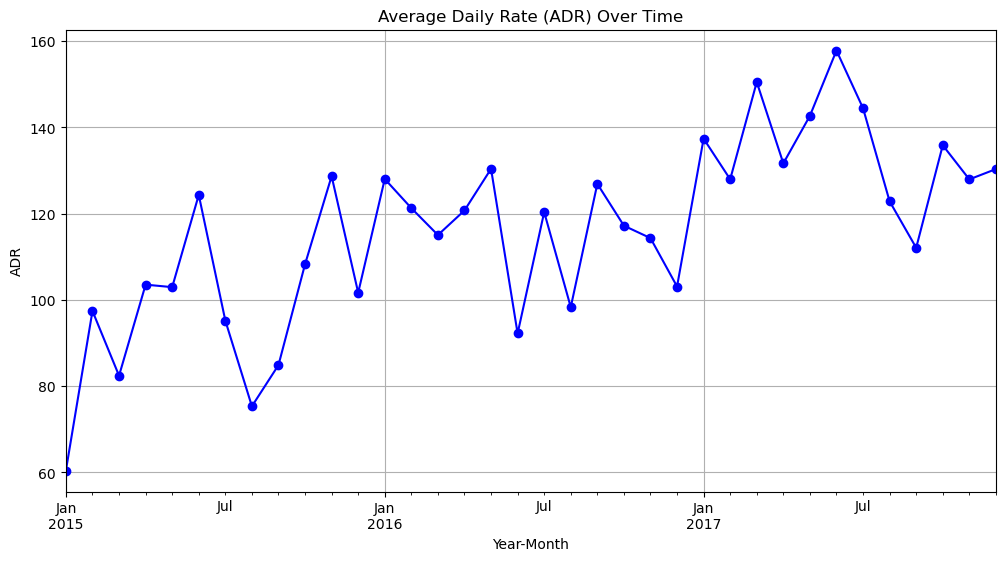

In [20]:
# Task_5_a

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract year and month for analysis
data['year_month'] = data['reservation_status_date'].dt.to_period('M')

# Calculate monthly ADR
adr_trends = data.groupby('year_month')['adr'].mean()

# Plot ADR trends
plt.figure(figsize=(12, 6))
adr_trends.plot(kind='line', marker='o', color='blue')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xlabel('Year-Month')
plt.ylabel('ADR')
plt.grid()
plt.show()

C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\3388016421.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_lead_time = data.groupby(pd.cut(data['lead_time'], bins=10))['revenue'].mean()


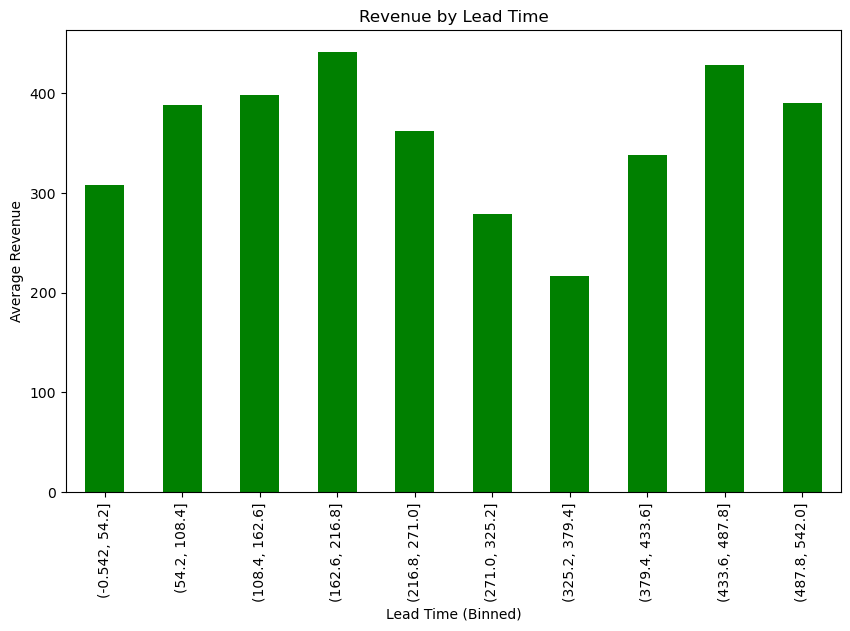

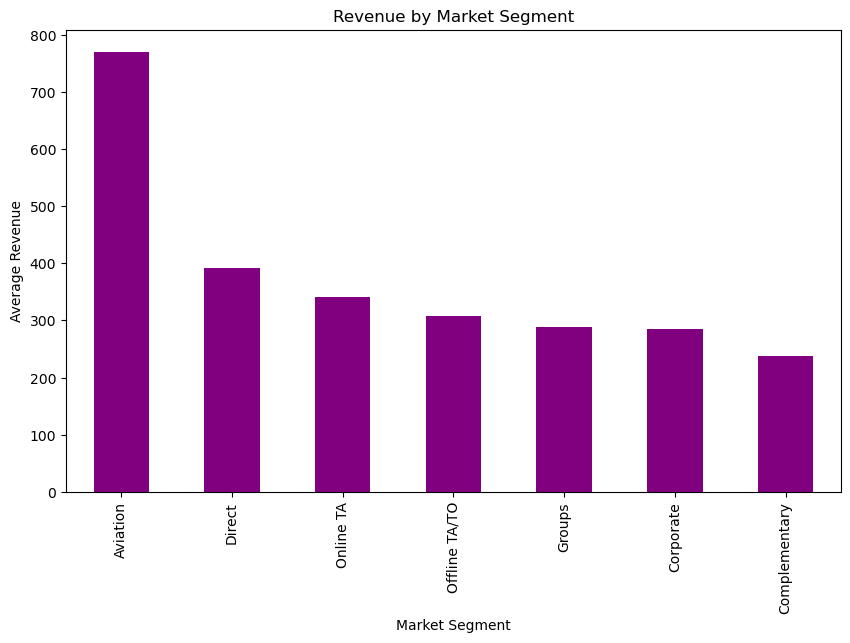

In [21]:
# Task_5_b

data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
data['revenue'] = data['adr'] * data['total_nights']

# Analyze revenue by lead time
revenue_by_lead_time = data.groupby(pd.cut(data['lead_time'], bins=10))['revenue'].mean()

# Plot revenue by lead time
plt.figure(figsize=(10, 6))
revenue_by_lead_time.plot(kind='bar', color='green')
plt.title('Revenue by Lead Time')
plt.xlabel('Lead Time (Binned)')
plt.ylabel('Average Revenue')
plt.show()

# Analyze revenue by market segment
revenue_by_segment = data.groupby('market_segment')['revenue'].mean()

# Plot revenue by market segment
plt.figure(figsize=(10, 6))
revenue_by_segment.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Revenue')
plt.show()

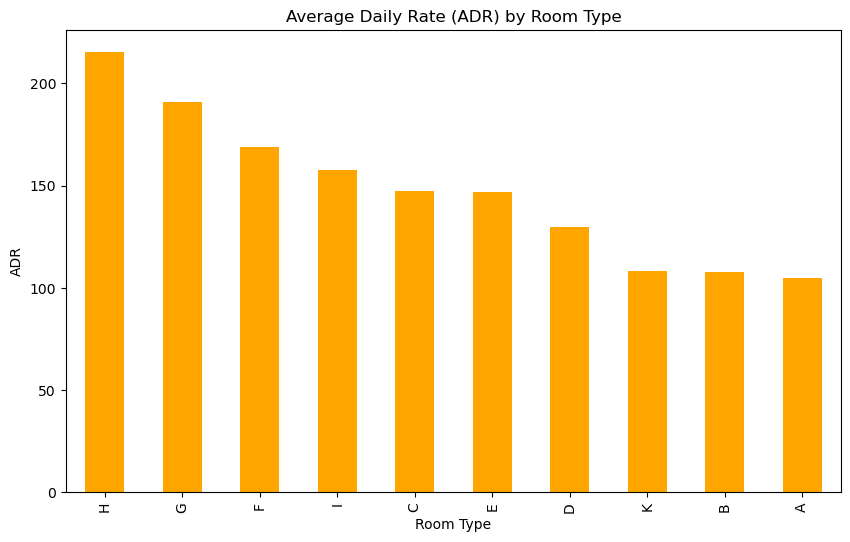

C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\209254569.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='assigned_room_type', y='adr', data=data, palette='viridis')


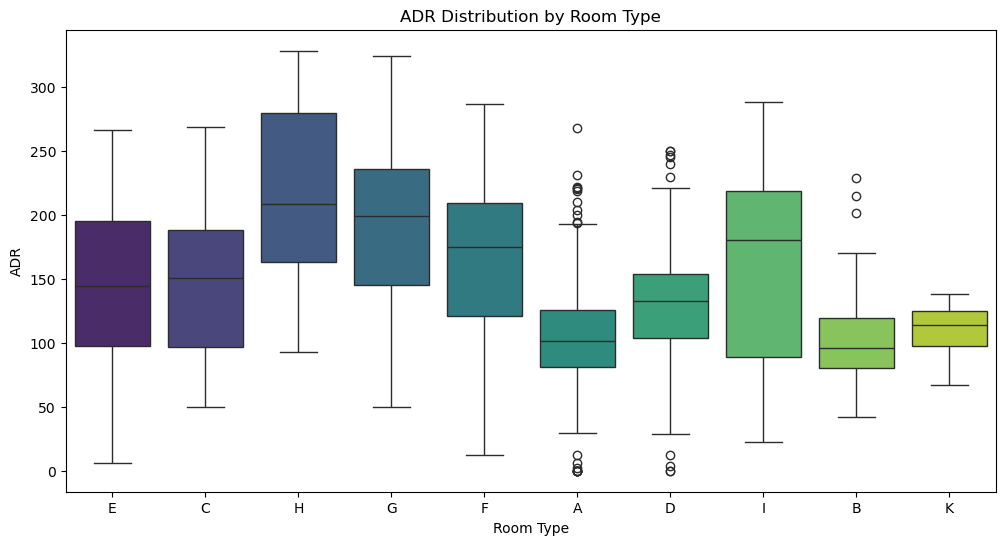

In [22]:
# Task_5_c

adr_by_room_type = data.groupby('assigned_room_type')['adr'].mean()

# Plot ADR by room type
plt.figure(figsize=(10, 6))
adr_by_room_type.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('ADR')
plt.show()

# Boxplot to show distribution of ADR for each room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='assigned_room_type', y='adr', data=data, palette='viridis')
plt.title('ADR Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('ADR')
plt.show()

Channel Effectiveness:
                      bookings  cancellations     avg_adr  total_revenue  \
distribution_channel                                                       
TA/TO                     1490            405  122.951060      501281.05   
Direct                     325             40  141.200677      127009.32   
Corporate                   33              0  102.665455       10314.52   
GDS                         21             12  136.801429        6796.09   

                      cancellation_rate  
distribution_channel                     
TA/TO                         27.181208  
Direct                        12.307692  
Corporate                      0.000000  
GDS                           57.142857  


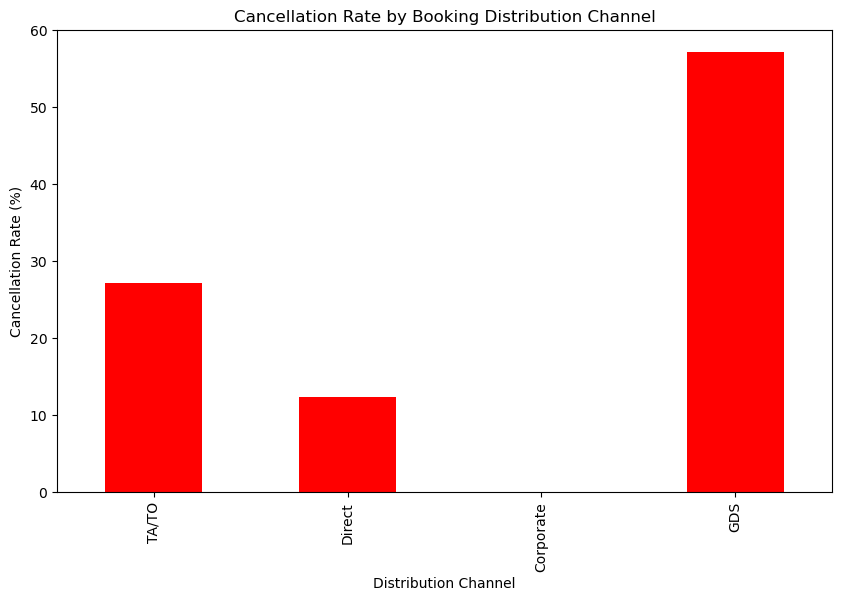

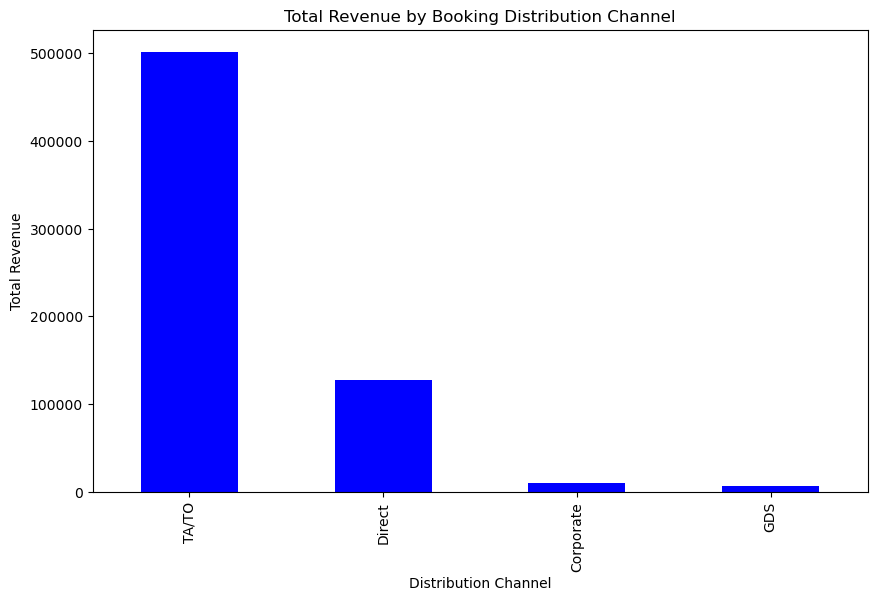

In [29]:
# Task_6_a 

channel_effectiveness = data.groupby('distribution_channel').agg(
    bookings=('reservation_status', 'count'),
    cancellations=('is_canceled', 'sum'),
    avg_adr=('adr', 'mean'),
    total_revenue=('revenue', 'sum')
)

# Calculate cancellation rate
channel_effectiveness['cancellation_rate'] = (channel_effectiveness['cancellations'] / 
                                              channel_effectiveness['bookings']) * 100

# Sort by total revenue
channel_effectiveness = channel_effectiveness.sort_values(by='total_revenue', ascending=False)

print("Channel Effectiveness:")
print(channel_effectiveness)

# Plot cancellation rate by channel
plt.figure(figsize=(10, 6))
channel_effectiveness['cancellation_rate'].plot(kind='bar', color='red')
plt.title('Cancellation Rate by Booking Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate (%)')
plt.show()

# Plot revenue by channel
plt.figure(figsize=(10, 6))
channel_effectiveness['total_revenue'].plot(kind='bar', color='blue')
plt.title('Total Revenue by Booking Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Revenue')
plt.show()

C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\2028072156.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_changes_analysis = data.groupby(pd.cut(data['booking_changes'], bins=[0, 1, 5, 10, 20]))[


Impact of Booking Changes on Cancellations and ADR:
                 is_canceled         adr
booking_changes                         
(0, 1]              0.161943  127.184049
(1, 5]              0.226277  132.856350
(5, 10]             0.000000  181.666667
(10, 20]            0.000000   95.000000


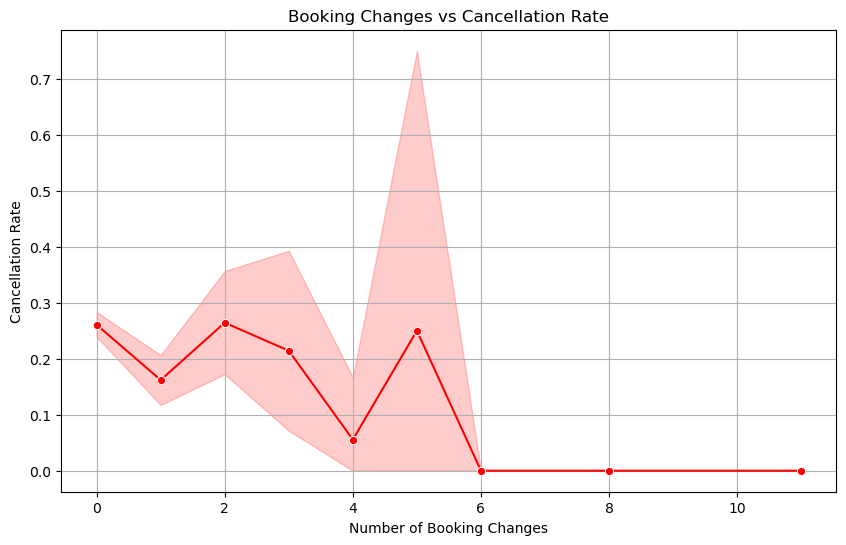

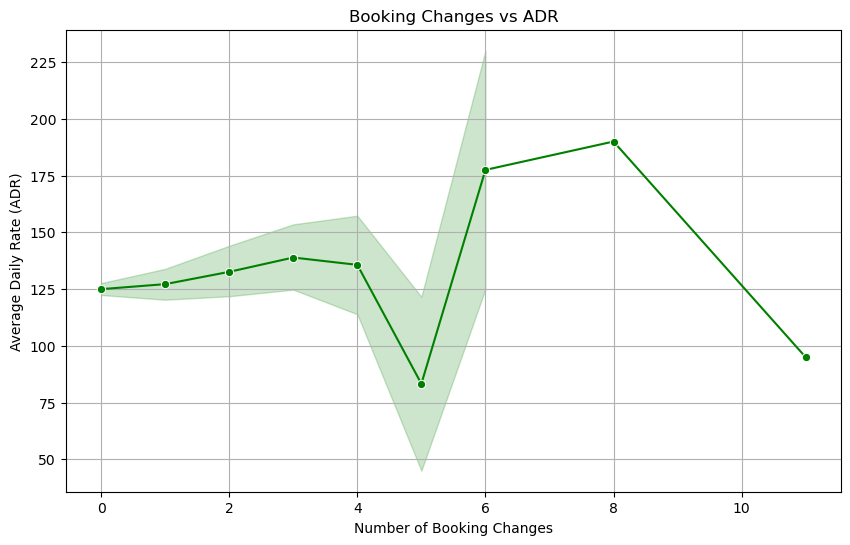

In [24]:
#Task_6_b 

booking_changes_analysis = data.groupby(pd.cut(data['booking_changes'], bins=[0, 1, 5, 10, 20]))[
    ['is_canceled', 'adr']
].mean()

print("Impact of Booking Changes on Cancellations and ADR:")
print(booking_changes_analysis)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x='booking_changes', y='is_canceled', data=data, marker='o', color='red')
plt.title('Booking Changes vs Cancellation Rate')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='booking_changes', y='adr', data=data, marker='o', color='green')
plt.title('Booking Changes vs ADR')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid()
plt.show()

Correlation between waiting list duration and cancellation: -0.03
Cancellation Rates by Waiting List Duration:
days_in_waiting_list
(0, 10]      NaN
(10, 30]     NaN
(30, 60]     0.0
(60, 100]    0.0
Name: is_canceled, dtype: float64


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\70615238.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  waiting_list_analysis = data.groupby(pd.cut(data['days_in_waiting_list'], bins=[0, 10, 30, 60, 100]))[


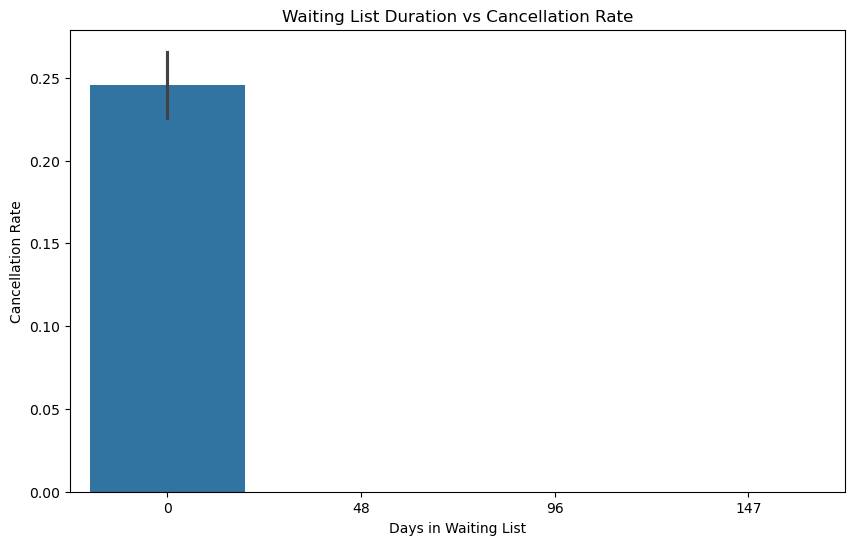

In [25]:
#Task_6_c

correlation = data['days_in_waiting_list'].corr(data['is_canceled'])
print(f"Correlation between waiting list duration and cancellation: {correlation:.2f}")

# Group by waiting list duration and calculate cancellation rate
waiting_list_analysis = data.groupby(pd.cut(data['days_in_waiting_list'], bins=[0, 10, 30, 60, 100]))[
    'is_canceled'
].mean()

print("Cancellation Rates by Waiting List Duration:")
print(waiting_list_analysis)

# Visualize waiting list duration vs cancellation rate
plt.figure(figsize=(10, 6))
sns.barplot(x='days_in_waiting_list', y='is_canceled', data=data)
plt.title('Waiting List Duration vs Cancellation Rate')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation Rate')
plt.show()

Repeated Guest Behavior:
                   average_nights  average_adr  average_special_requests
is_repeated_guest                                                       
0                        2.744324   126.209870                  0.763784
1                        1.578947    97.885789                  0.736842


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\1493682571.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_repeated_guest', y='total_nights', data=data, ci=None, palette='viridis')
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\1493682571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_repeated_guest', y='total_nights', data=data, ci=None, palette='viridis')


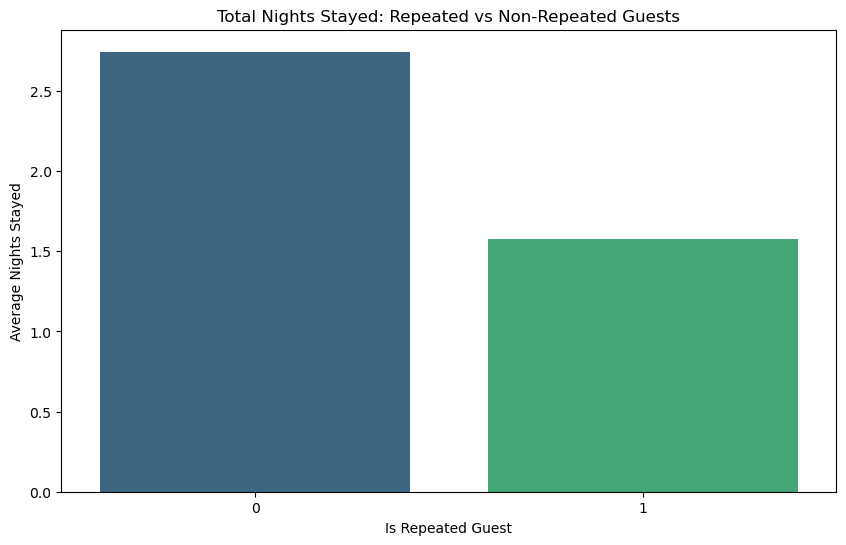

In [26]:
#Task 7): a) # Analyze behavior of repeated guests
repeated_guest_analysis = data.groupby('is_repeated_guest').agg(
    average_nights=('total_nights', 'mean'),
    average_adr=('adr', 'mean'),
    average_special_requests=('total_of_special_requests', 'mean')
)

print("Repeated Guest Behavior:")
print(repeated_guest_analysis)

# Visualization of stay patterns
plt.figure(figsize=(10, 6))
sns.barplot(x='is_repeated_guest', y='total_nights', data=data, ci=None, palette='viridis')
plt.title('Total Nights Stayed: Repeated vs Non-Repeated Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Nights Stayed')
plt.show()

Special Requests by Guest Type:
is_repeated_guest
0    0.763784
1    0.736842
Name: total_of_special_requests, dtype: float64


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\4200712077.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_repeated_guest', y='total_of_special_requests', data=data, ci=None, palette='coolwarm')
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_26340\4200712077.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_repeated_guest', y='total_of_special_requests', data=data, ci=None, palette='coolwarm')


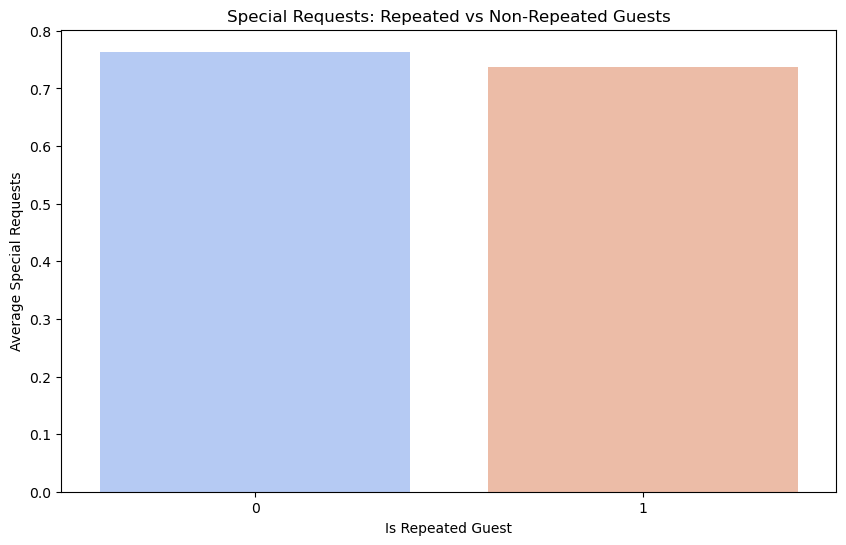

Correlation between special requests and repeat business: -0.00


In [27]:
#Task_7_b 

loyalty_special_requests = data.groupby('is_repeated_guest')['total_of_special_requests'].mean()

print("Special Requests by Guest Type:")
print(loyalty_special_requests)

# Visualization of special requests accommodation
plt.figure(figsize=(10, 6))
sns.barplot(x='is_repeated_guest', y='total_of_special_requests', data=data, ci=None, palette='coolwarm')
plt.title('Special Requests: Repeated vs Non-Repeated Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Special Requests')
plt.show()

# Correlation between special requests and repeat business
correlation = data['total_of_special_requests'].corr(data['is_repeated_guest'])
print(f"Correlation between special requests and repeat business: {correlation:.2f}")

Factors Contributing to Repeat Business:
                      avg_adr  avg_lead_time  avg_special_requests  \
is_repeated_guest                                                    
0                  126.209870      69.371351              0.763784   
1                   97.885789      11.631579              0.736842   

                   cancellation_rate  
is_repeated_guest                     
0                           0.246486  
1                           0.052632  


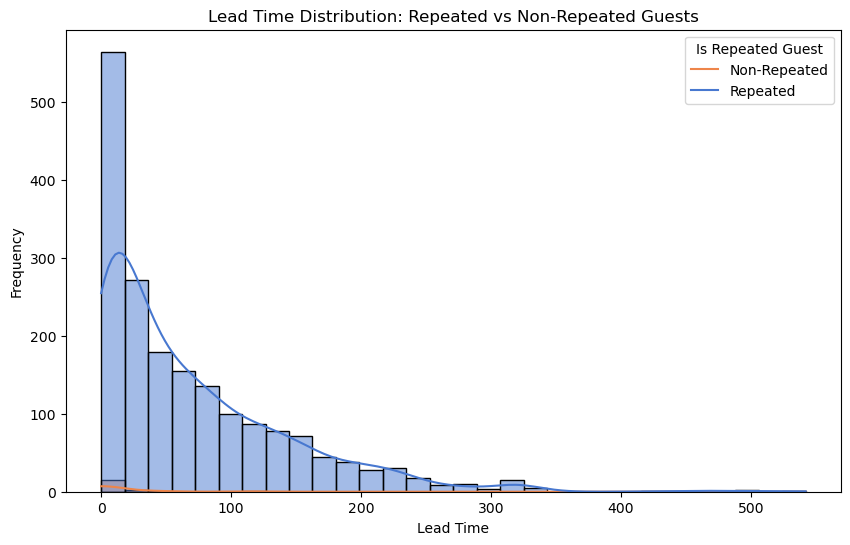

In [28]:
#Task 7: c) # Factors contributing to repeat business
repeat_factors = data.groupby('is_repeated_guest').agg(
    avg_adr=('adr', 'mean'),
    avg_lead_time=('lead_time', 'mean'),
    avg_special_requests=('total_of_special_requests', 'mean'),
    cancellation_rate=('is_canceled', 'mean')
)

print("Factors Contributing to Repeat Business:")
print(repeat_factors)

# Visualize lead time distribution for repeated and non-repeated guests
plt.figure(figsize=(10, 6))
sns.histplot(data, x='lead_time', hue='is_repeated_guest', kde=True, palette='muted', bins=30)
plt.title('Lead Time Distribution: Repeated vs Non-Repeated Guests')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.legend(title='Is Repeated Guest', labels=['Non-Repeated', 'Repeated'])
plt.show()